In [178]:
import pymongo
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from classifier import classifier

In [179]:
# connect to MongoDB
conn = "mongodb://localhost:27017"
client = pymongo.MongoClient(conn)
db = client.twitter_db

In [180]:
# create dataframe
df = pd.DataFrame(list(db.restaurants.find()))
df.head()

,_id,search_term,date_posted,original_tweet,clean_tokenized_tweet,num_of_favorites,num_of_replies,num_retweets,username,tweet_id
0,5f4d92a55843bc73d005b0be,cheesecake factory,2019-01-27 23:54:08,breaking down in the middle of the cheesecake ...,"[break, down, in, the, middle, of, the, cheese...",0,0,0,bbhwrld,1089672940013084672
1,5f4d92a55843bc73d005b0bf,cheesecake factory,2019-01-27 23:47:59,Oooweee that fresh banana cheesecake from the ...,"[oooweee, that, fresh, banana, cheesecake, fro...",0,0,0,Signed_SDot,1089671390352080896
2,5f4d92a55843bc73d005b0c0,cheesecake factory,2019-01-27 23:43:43,The discovery that Cheesecake Factory delivers...,"[the, discovery, that, cheesecake, factory, de...",7,1,0,thebasicbennett,1089670319823089664
3,5f4d92a55843bc73d005b0c1,cheesecake factory,2019-01-27 23:40:33,Happy 20th birthday to my Lil'Rog!!! Love U!!!...,"[happy, birthday, to, my, lil'rog, love, u, th...",0,0,0,MoneyCoach365,1089669519403044866
4,5f4d92a55843bc73d005b0c2,cheesecake factory,2019-01-27 23:38:12,IM AT THE CHEESECAKE FACTORY AND MY MIND IS BL...,"[im, at, the, cheesecake, factory, and, my, mi...",0,0,0,satistae,1089668929583177728


### Classifying all Tweets in dataset

In [181]:
tokenized_tweets = df["clean_tokenized_tweet"]
positive_count = 0
negative_count = 0
other_count = 0

for tweet in tokenized_tweets:
    result = classifier.classify(dict([token, True] for token in tweet))
    if result == "Negative":
        negative_count += 1
    elif result == "Positive":
        positive_count += 1
    else:
        print(result)
        other_count += 1

print(f"Positive: {positive_count}")
print(f"Negative: {negative_count}")
print(f"Other: {other_count}")

Positive: 8124
Negative: 3876
Other: 0


### Classifying specific months of tweets

In [182]:
# define month to search for (1-12)
search_months = [1,2,3,4,5,6,7,8,9,10,11,12]

# searching for matching dates
def classify_monthly(search_month):
    # find dates in DB that match search month
    dates = []
    for date in df["date_posted"]:
        if date.month == search_month:
            dates.append(date) 

    # collecting monthly data from DF
    month_rows = []
    for index, row in df.iterrows():
        if row["date_posted"] in dates:
            month_rows.append(row) 

    # classifying tweets
    month_positive_count = 0
    month_negative_count = 0
    month_other_count = 0
    for row in month_rows:
        result = classifier.classify(dict([token, True] for token in row["clean_tokenized_tweet"]))
        if result == "Negative":
            month_negative_count += 1
        elif result == "Positive":
            month_positive_count += 1
        else:
            print(result)
            month_other_count += 1
    
    print("-"*15)
    print(f"Month: {search_month}")
    print(f"Positive: {month_positive_count}")
    print(f"Negative: {month_negative_count}")
    print(f"Other: {month_other_count}")
    print("-"*15)
    
    return month_positive_count, month_negative_count, month_other_count

In [183]:
positive_list = []
negative_list = []
other_list = []
year_total_pos = 0
year_total_neg = 0
year_total_oth = 0

for month in search_months:
    total_pos = 0
    total_neg = 0
    total_other = 0
    
    pos, neg, oth = classify_monthly(month)
    total_pos = total_pos + pos
    total_neg = total_neg + neg
    total_other = total_other + oth
    
    positive_list.append(total_pos)
    negative_list.append(total_neg)
    other_list.append(total_other)
    
    year_total_pos = year_total_pos + pos
    year_total_neg = year_total_neg + neg
    year_total_oth = year_total_oth + oth
    
print(f"Total Positive: {year_total_pos}")
print(f"Total Negative: {year_total_neg}")
print(f"Total Other: {total_other}")

---------------
Month: 1
Positive: 681
Negative: 319
Other: 0
---------------
---------------
Month: 2
Positive: 705
Negative: 295
Other: 0
---------------
---------------
Month: 3
Positive: 674
Negative: 326
Other: 0
---------------
---------------
Month: 4
Positive: 694
Negative: 306
Other: 0
---------------
---------------
Month: 5
Positive: 695
Negative: 305
Other: 0
---------------
---------------
Month: 6
Positive: 662
Negative: 338
Other: 0
---------------
---------------
Month: 7
Positive: 668
Negative: 332
Other: 0
---------------
---------------
Month: 8
Positive: 637
Negative: 363
Other: 0
---------------
---------------
Month: 9
Positive: 672
Negative: 328
Other: 0
---------------
---------------
Month: 10
Positive: 691
Negative: 309
Other: 0
---------------
---------------
Month: 11
Positive: 665
Negative: 335
Other: 0
---------------
---------------
Month: 12
Positive: 680
Negative: 320
Other: 0
---------------
Total Positive: 8124
Total Negative: 3876
Total Other: 0


In [184]:
positive_list

[681, 705, 674, 694, 695, 662, 668, 637, 672, 691, 665, 680]

In [185]:
negative_list

[319, 295, 326, 306, 305, 338, 332, 363, 328, 309, 335, 320]

### Plotting Sentiment Trends

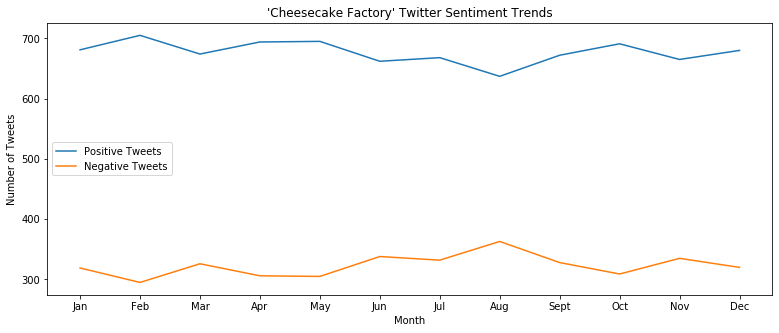

In [187]:
plt.figure(figsize=(13,5))
x_values = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct","Nov", "Dec"]
plt.plot(x_values, positive_list, label="Positive Tweets")
plt.plot(x_values, negative_list, label="Negative Tweets")
plt.legend(loc="center left")
plt.xlabel("Month")
plt.ylabel("Number of Tweets")
plt.title(f"'{df.search_term[0].title()}' Twitter Sentiment Trends")
plt.show()